# *Short-Time Fourier Transform* in sinusoidal signals
This notebook aims to show how to apply the Short-Time Fourier Transform (STFT) in a simple sinusoidal signal in python. In order to do so, we will first generate a sinusoidal signal (i.e. periodic) and then apply and interpret its STFT.

In [4]:
### Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import scipy.signal as signal

## Generating the signal

In [38]:
## Sampling:
fs = 1e3  #1kHz
T = 1/fs  #Período, em segundos, da amostragem do sinal
tf = 6  #Tempo final do sinal (e.g. 1 segundo)
ti = 5  #Tempo inicial do sinal (e.g. 0 segundo)

t = np.arange(ti,tf,T)

The sinusoidal signal is generated from the following function:  
$y(t) = sin(2\pi ft)$, where $f$ is the frequency in Hertz of the signal $y(t)$ and $t$ is the time serie generated above.

In [39]:
## Defining some useful functions
def gen_sinus(freq, amp, timeSerie):
    '''Returns the time serie for a sinusoidal signal, where:
        freq = frequency in Hertz (integer);
        amp = signal amplitude (float);
        timeSerie = the linear time serie accordingly to the sample rate.'''
    signal = amp*np.sin(freq*2*np.pi*timeSerie)
    return signal    

def plot_signal(signal):
    '''Plots a signal defined in the time domain.'''

In [40]:
sign1 = gen_sinus(2,1,t)
sign2 = gen_sinus(4,1,t)

In [16]:
## Generating the signal from the relation above:
sign1 = np.sin(freq1*2*np.pi*t) 
sign2 = np.sin(freq2*2*np.pi*t)

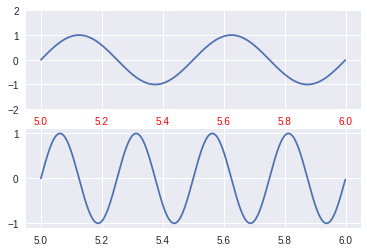

In [41]:
## Plotting the sinusoidal signals in the time domain:
fig = plt.figure(1) 

ax1 = fig.add_subplot(211)
ax1.plot(t, sign1)
ax1.grid(True)
ax1.set_ylim((-2, 2))
#ax1.set_ylabel('1 Hz')
#ax1.set_title('A sine wave or two')

for label in ax1.get_xticklabels():
    label.set_color('r')

ax2 = fig.add_subplot(212)
ax2.plot(t, sign2)
ax2.grid(True)
#ax2.set_ylim((-2, 2))
#l = ax2.set_xlabel('Hi mom')
l.set_color('g')
l.set_fontsize('large')

plt.show()

In [33]:
t

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00])

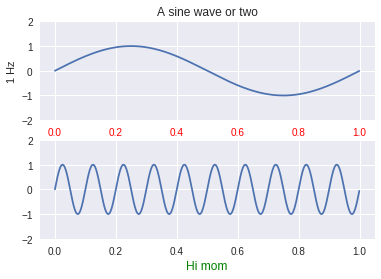

In [6]:
fig = plt.figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))
ax1.grid(True)
ax1.set_ylim((-2, 2))
ax1.set_ylabel('1 Hz')
ax1.set_title('A sine wave or two')

for label in ax1.get_xticklabels():
    label.set_color('r')


ax2 = fig.add_subplot(212)
ax2.plot(t, np.sin(10*2*np.pi*t))
ax2.grid(True)
ax2.set_ylim((-2, 2))
l = ax2.set_xlabel('Hi mom')
l.set_color('g')
l.set_fontsize('large')

plt.show()